In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import time
from algo import *
from util import *
from environment import *
from ids import *

In [2]:
def set_experiment2(price_list=np.linspace(0.01,1,100), segments=1000, update_freq=10, T=1000):
    start = time.time()
    exp_MAB_1 = pricing_MAB(price_list=price_list, segments=segments,update_freq=update_freq, exp='exp2', T=T)
    exp_MAB_1.segments_means(param1=3,param2=6)
    df = exp_MAB_1.true_optimal()
    print('time:',time.time()-start)
    return exp_MAB_1, df

In [3]:
#changeable parameters
np.random.seed(88)
price_list=np.linspace(0.01,1,20)
T = 2000

#fix parameters
segments = 1000
update_freq = 10
trial_rounds = 10
exp_MAB_1, df = set_experiment2(price_list=price_list, segments=segments, update_freq =10, T=T)

The true optimal arm in first 1000 rounds is: 5
The true optimal arm in the rest is: 9
time: 25.505642890930176


In [4]:
#IDS_1
IDS_1_df = pd.DataFrame()
IDS_1_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDS_1 = IDS_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=2,
                     simulate_time_initiate=1, simulate_time_update=1, window_width=100, eg_p=0)
    IDS_1_sum, IDS_1_pt, IDS_1_re, IDS_1_arm, IDS_1_post = IDS_1.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDS_1 time:',end-start)
    IDS_1_df = IDS_1_df.append([np.cumsum(IDS_1_re)])
    IDS_1_df_arm = IDS_1_df_arm.append([IDS_1_arm])

Reward change detected at time: 980
Detected Sign: -1
Detector cooling
Reward change detected at time: 1004
Detected Sign: -1
trial 0 IDS_1 time: 35.94297814369202
Reward change detected at time: 633
Detected Sign: -1
Reward change detected at time: 738
Detected Sign: -1
Detector cooling
Detector cooling
Reward change detected at time: 766
Detected Sign: -1
trial 1 IDS_1 time: 47.96581792831421
Reward change detected at time: 267
Detected Sign: -1
Detector cooling
Detector cooling
Detector cooling
Reward change detected at time: 821
Detected Sign: -1
Reward change detected at time: 1003
Detected Sign: -1
trial 2 IDS_1 time: 50.48508286476135
Reward change detected at time: 468
Detected Sign: -1
Reward change detected at time: 1003
Detected Sign: -1
trial 3 IDS_1 time: 36.386898040771484
Reward change detected at time: 1002
Detected Sign: -1
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector co

In [5]:
#IDST_1
IDST_1_df = pd.DataFrame()
IDST_1_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDST_1 = IDS_theta_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=0,
                     simulate_time_initiate=1, simulate_time_update=1, window_width=100, eg_p=0)
    IDST_1_sum, IDST_1_pt, IDST_1_re, IDST_1_arm, IDST_1_post = IDST_1.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDST_1 time:',end-start)
    IDST_1_df = IDST_1_df.append([np.cumsum(IDST_1_re)])
    IDST_1_df_arm = IDST_1_df_arm.append([IDST_1_arm])

Reward change detected at time: 207
Detected Sign: -1
Reward change detected at time: 549
Detected Sign: 1
Reward change detected at time: 729
Detected Sign: -1
Reward change detected at time: 1003
Detected Sign: -1
Reward change detected at time: 1246
Detected Sign: -1
trial 0 IDST_1 time: 122.36676383018494
Reward change detected at time: 430
Detected Sign: -1
Reward change detected at time: 1002
Detected Sign: -1
trial 1 IDST_1 time: 51.771568059921265
Reward change detected at time: 261
Detected Sign: -1
Reward change detected at time: 653
Detected Sign: -1
Detector cooling
Reward change detected at time: 1005
Detected Sign: 1
trial 2 IDST_1 time: 77.82118082046509
Reward change detected at time: 600
Detected Sign: -1
Reward change detected at time: 1896
Detected Sign: 1
trial 3 IDST_1 time: 42.463027000427246
Reward change detected at time: 996
Detected Sign: 1
Detector cooling
trial 4 IDST_1 time: 25.597978115081787
Reward change detected at time: 246
Detected Sign: -1
Detector c

In [6]:
#IDS_2 L=4 n=1
IDS_2_df = pd.DataFrame()
IDS_2_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDS_2 = IDS_pull(price_list=price_list, N=update_freq+1, start_L=4, update_L=0,
                     simulate_time_initiate=1, simulate_time_update=1, window_width=100, eg_p=0)
    IDS_2_sum, IDS_2_pt, IDS_2_re, IDS_2_arm, IDS_2_post = IDS_2.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDS_2 time:',end-start)
    IDS_2_df = IDS_2_df.append([np.cumsum(IDS_2_re)])
    IDS_2_df_arm = IDS_2_df_arm.append([IDS_2_arm])
    
#IDS_3 L=2 n=2
IDS_3_df = pd.DataFrame()
IDS_3_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDS_3 = IDS_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=0,
                     simulate_time_initiate=2, simulate_time_update=1, window_width=100, eg_p=0)
    IDS_3_sum, IDS_3_pt, IDS_3_re, IDS_3_arm, IDS_3_post = IDS_3.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDS_3 time:',end-start)
    IDS_3_df = IDS_3_df.append([np.cumsum(IDS_3_re)])
    IDS_3_df_arm = IDS_3_df_arm.append([IDS_3_arm])

Reward change detected at time: 1005
Detected Sign: -1
trial 0 IDS_2 time: 22.002634048461914
Reward change detected at time: 1003
Detected Sign: -1
Detector cooling
trial 1 IDS_2 time: 21.715261936187744
Reward change detected at time: 1003
Detected Sign: -1
Detector cooling
trial 2 IDS_2 time: 22.07680892944336
Reward change detected at time: 252
Detected Sign: -1
Reward change detected at time: 1003
Detected Sign: -1
Detector cooling
Reward change detected at time: 1605
Detected Sign: -1
Detector cooling
trial 3 IDS_2 time: 50.087910890579224
Reward change detected at time: 219
Detected Sign: -1
Detector cooling
Reward change detected at time: 986
Detected Sign: -1
Detector cooling
Detector cooling
Detector cooling
Detector cooling
trial 4 IDS_2 time: 37.153268814086914
Reward change detected at time: 215
Detected Sign: -1
Reward change detected at time: 633
Detected Sign: -1
Reward change detected at time: 972
Detected Sign: -1
Reward change detected at time: 1002
Detected Sign: -1

In [7]:
# UCB1 c=1
UCB_1_df = pd.DataFrame()
UCB_1_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCB1 = UCBPI_pull(price_list=price_list, segments=segments, c=1, bias=0, UCB1=True, tuned=False)
    UCB1_sum, UCB1_pt, UCB1_re, UCB1_arm = UCB1.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCB_1 time:',end-start)
    UCB_1_df = UCB_1_df.append([np.cumsum(UCB1_re)])
    UCB_1_df_arm = UCB_1_df_arm.append([UCB1_arm])

# UCB1 c=2
UCB_2_df = pd.DataFrame()
UCB_2_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCB1 = UCBPI_pull(price_list=price_list, segments=segments, c=2, bias=0, UCB1=True, tuned=False)
    UCB1_sum, UCB1_pt, UCB1_re, UCB1_arm = UCB1.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCB_2 time:',end-start)
    UCB_2_df = UCB_2_df.append([np.cumsum(UCB1_re)])
    UCB_2_df_arm = UCB_2_df_arm.append([UCB1_arm])
    

# UCB-tuned
UCBT_df = pd.DataFrame()
UCBT_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCB1 = UCBPI_pull(price_list=price_list, segments=segments, c=2, bias=0, UCB1=True, tuned=True)
    UCB1_sum, UCB1_pt, UCB1_re, UCB1_arm = UCB1.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCB-tuned time:',end-start)
    UCBT_df = UCBT_df.append([np.cumsum(UCB1_re)])
    UCBT_df_arm = UCBT_df_arm.append([UCB1_arm])
    
# UCBPI
UCBPI_df = pd.DataFrame()
UCBPI_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCBPI = UCBPI_pull(price_list=price_list, segments=segments, c=2, bias=0, UCB1=False, tuned=True)
    UCBPI_sum, UCBPI_pt, UCBPI_re, UCBPI_arm = UCBPI.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCBPI time:',end-start)
    UCBPI_df = UCBPI_df.append([np.cumsum(UCBPI_re)])
    UCBPI_df_arm = UCBPI_df_arm.append([UCBPI_arm])
    
# TS
TS_df = pd.DataFrame()
TS_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    TS = TS_pull(price_list=price_list, est='MEAN')
    TS_sum, TS_pt, TS_re, TS_arm = TS.TS(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'TS time:',end-start)
    TS_df = TS_df.append([np.cumsum(TS_re)])
    TS_df_arm = TS_df_arm.append([TS_arm])

# EG e=0.05
EG_1_df = pd.DataFrame()
EG_1_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    EG = EG_pull(price_list=price_list)
    EG_sum, EG_pt, EG_re, EG_arm = EG.EG(T=T, pricing_MAB=exp_MAB_1, e=0.05)
    end = time.time()
    print('trial',i, 'EG 0.05 time:',end-start)
    EG_1_df = EG_1_df.append([np.cumsum(EG_re)])
    EG_1_df_arm = EG_1_df_arm.append([EG_arm])

# EG p=0.1
EG_2_df = pd.DataFrame()
EG_2_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    EG = EG_pull(price_list=price_list)
    EG_sum, EG_pt, EG_re, EG_arm = EG.EG(T=T, pricing_MAB=exp_MAB_1, e=0.1)
    end = time.time()
    print('trial',i, 'EG 0.1 time:',end-start)
    EG_2_df = EG_2_df.append([np.cumsum(EG_re)])
    EG_2_df_arm = EG_2_df_arm.append([EG_arm])
    
# EG e=0.15
EG_3_df = pd.DataFrame()
EG_3_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    EG = EG_pull(price_list=price_list)
    EG_sum, EG_pt, EG_re, EG_arm = EG.EG(T=T, pricing_MAB=exp_MAB_1, e=0.15)
    end = time.time()
    print('trial',i, 'EG 0.15 time:',end-start)
    EG_3_df = EG_3_df.append([np.cumsum(EG_re)])
    EG_3_df_arm = EG_3_df_arm.append([EG_arm])

trial 0 UCB_1 time: 0.7416808605194092
trial 1 UCB_1 time: 0.7406752109527588
trial 2 UCB_1 time: 0.7399890422821045
trial 3 UCB_1 time: 0.7399849891662598
trial 4 UCB_1 time: 0.7392861843109131
trial 5 UCB_1 time: 0.7407219409942627
trial 6 UCB_1 time: 0.7383937835693359
trial 7 UCB_1 time: 0.7391269207000732
trial 8 UCB_1 time: 0.7353761196136475
trial 9 UCB_1 time: 0.7362539768218994
trial 0 UCB_2 time: 0.7377891540527344
trial 1 UCB_2 time: 0.7366321086883545
trial 2 UCB_2 time: 0.7359499931335449
trial 3 UCB_2 time: 0.7366938591003418
trial 4 UCB_2 time: 0.7366800308227539
trial 5 UCB_2 time: 0.7355740070343018
trial 6 UCB_2 time: 0.7360599040985107
trial 7 UCB_2 time: 0.7357971668243408
trial 8 UCB_2 time: 0.7384381294250488
trial 9 UCB_2 time: 0.7391831874847412
trial 0 UCB-tuned time: 1.401498794555664
trial 1 UCB-tuned time: 1.4154410362243652
trial 2 UCB-tuned time: 1.4064371585845947
trial 3 UCB-tuned time: 1.4252517223358154
trial 4 UCB-tuned time: 1.4106669425964355
trial 

In [19]:
def draw_exp_graph(IDS_1, IDS_2, IDS_3, IDST_1, UCB_1, UCB_2, UCBT, UCBPI, TS, EG_1, EG_2, EG_3, title):
    
    IDS_1_mean = IDS_1.mean()
    IDS_2_mean = IDS_2.mean()
    IDS_3_mean = IDS_3.mean()
    IDST_1_mean = IDST_1.mean()
    UCB_1_mean = UCB_1.mean()
    UCB_2_mean =UCB_2.mean()
    UCBT_mean = UCBT.mean()
    UCBPI_mean = UCBPI.mean()
    TS_mean = TS.mean()
    EG_1_mean = EG_1.mean()
    EG_2_mean = EG_2.mean()
    EG_3_mean = EG_3.mean()
    
    T = np.arange(EG_1.shape[1])
    trial = EG_1.shape[0]
    
    plt.figure(figsize=(30,20))
    sns.set(font_scale=2, style='white')
    
    plt.plot(EG_1_mean,alpha=1,color='#000000', linestyle='-')
    plt.fill_between(T, EG_1.min(), EG_1.max(), color='#000000', alpha=0.2)
    
    plt.plot(EG_2_mean,alpha=1,color='#000000', linestyle='-.')
    plt.fill_between(T, EG_2.min(), EG_2.max(), color='#000000', alpha=0.2)
    
    plt.plot(EG_3_mean,alpha=1,color='#000000', linestyle='--')
    plt.fill_between(T, EG_3.min(), EG_3.max(), color='#000000', alpha=0.2)
    
    plt.plot(TS_mean,alpha=1,color='#666666', linestyle='-')
    plt.fill_between(T, TS.min(), TS.max(), color='#666666', alpha=0.2)
    
    plt.plot(UCB_1_mean,alpha=1,color='#666600', linestyle='-')
    plt.fill_between(T, UCB_1.min(), UCB_1.max(), color='#666600', alpha=0.2)
    
    plt.plot(UCB_2_mean,alpha=1,color='#666600', linestyle='-.')
    plt.fill_between(T, UCB_2.min(), UCB_2.max(), color='#666600', alpha=0.2)
    
    plt.plot(UCBT_mean,alpha=1,color='#666600', linestyle='--')
    plt.fill_between(T, UCBT.min(), UCBT.max(), color='#666600', alpha=0.2)

    plt.plot(UCBPI_mean,alpha=1,color='#666600', linestyle=':')
    plt.fill_between(T, UCBPI.min(), UCBPI.max(), color='#666600', alpha=0.2)

    plt.plot(IDS_1_mean,alpha=1,color='#FF6666', linestyle='-')
    plt.fill_between(T, IDS_1.min(), IDS_1.max(), color='#FF6666', alpha=0.2)

    plt.plot(IDS_2_mean,alpha=1,color='#FF6666', linestyle='-.')
    plt.fill_between(T, IDS_2.min(), IDS_2.max(), color='#FF6666', alpha=0.2)

    plt.plot(IDS_3_mean,alpha=1,color='#FF6666', linestyle='--')
    plt.fill_between(T, IDS_3.min(), IDS_3.max(), color='#FF6666', alpha=0.2)

    plt.plot(IDST_1_mean,alpha=1,color='#FF6666', linestyle=':')
    plt.fill_between(T, IDST_1.min(), IDST_1.max(), color='#FF6666', alpha=0.2)
    
    plt.legend(['EG_1', 'EG_2', 'EG_3', 'TS', 'UCB1', 'UCB2', 'UCB-tuned', 'UCBPI', 'IDS_1 L=2, n=1', 'IDS2 L=4, n=1', 'IDS L=2, n=2', 'IDS Theta'],
              bbox_to_anchor=(0.85, -0.05), ncol=6, fancybox=True)
    plt.title(title)
    plt.xlabel('Horizon')
    plt.ylabel('Cumulative Reward')
    plt.show()

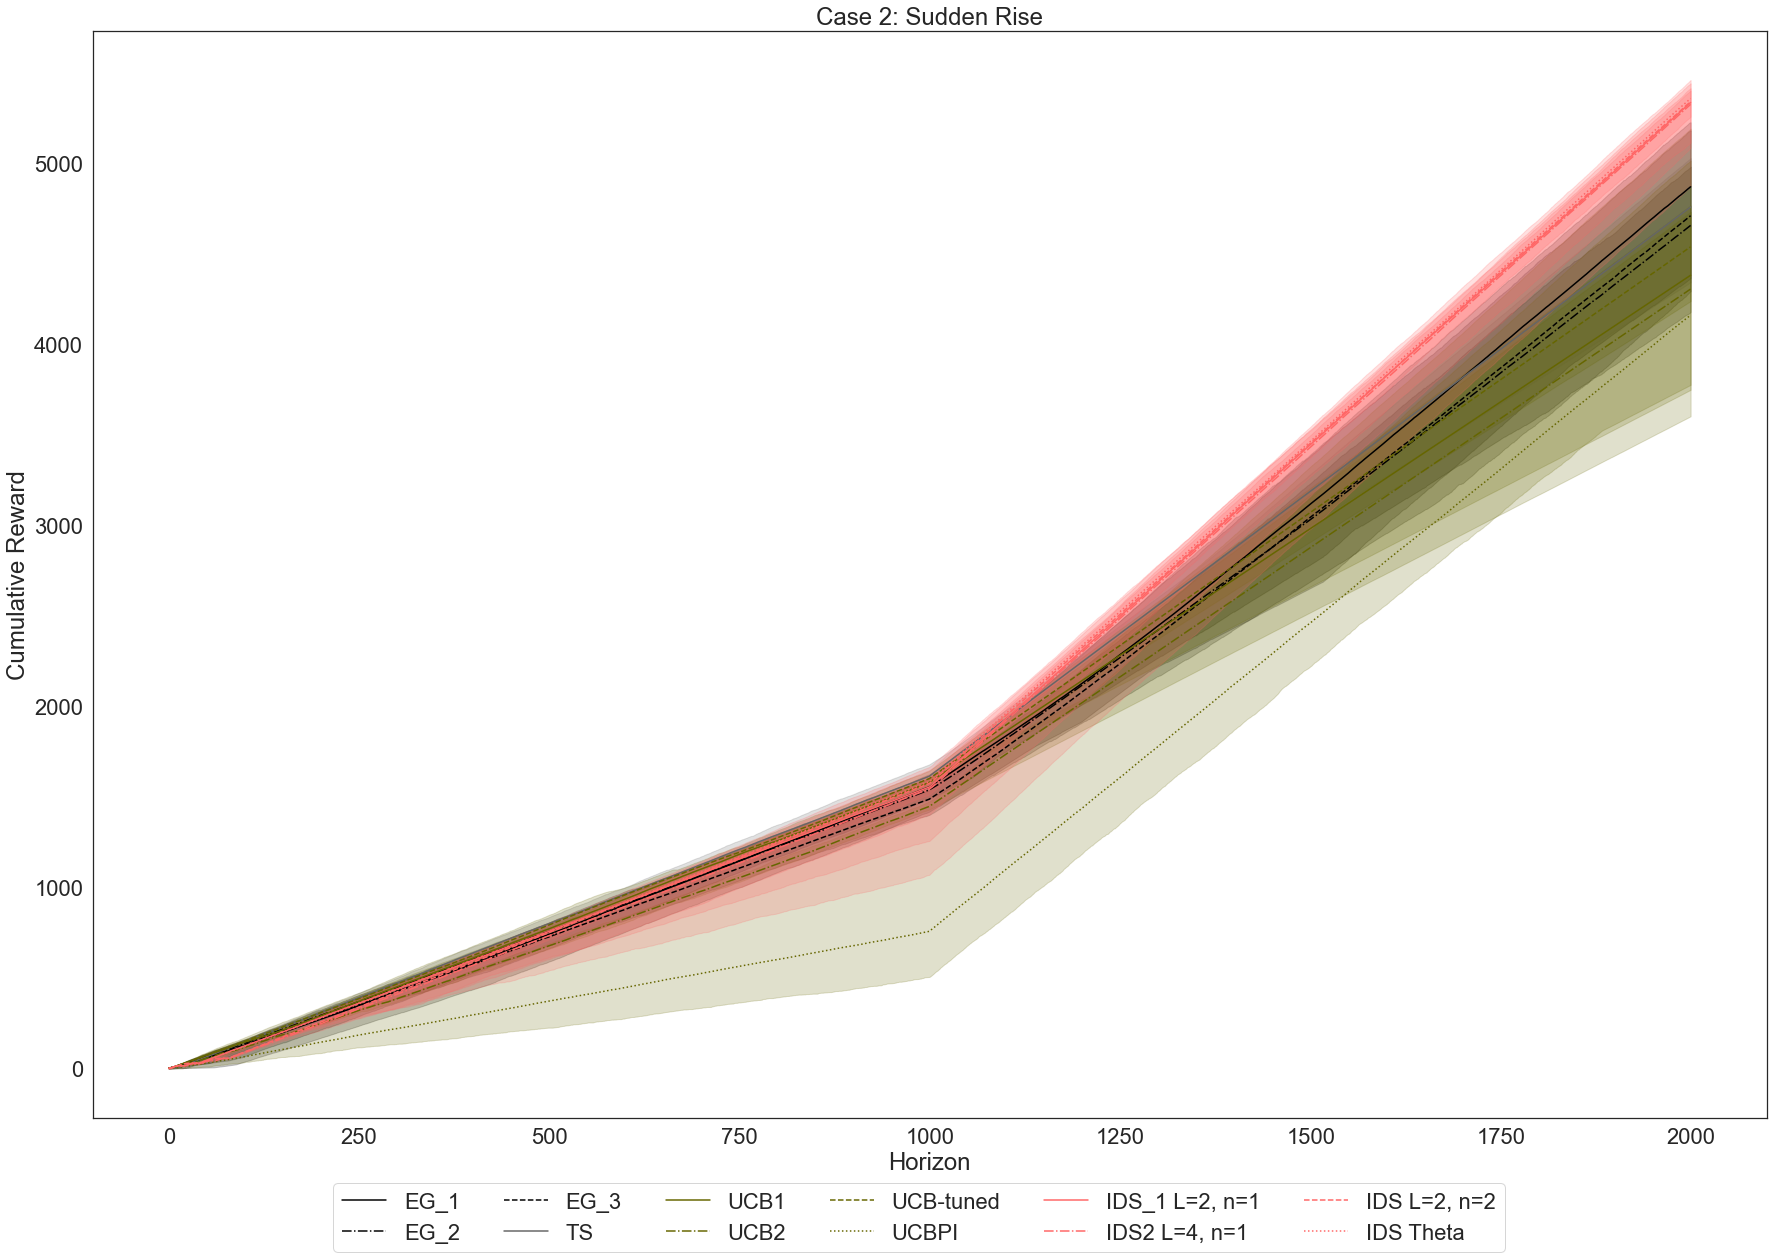

In [20]:
title = 'Case 2: Sudden Rise'
draw_exp_graph(IDS_1_df, IDS_2_df, IDS_3_df, IDST_1_df,UCB_1_df, UCB_2_df, UCBT_df,UCBPI_df,TS_df,EG_1_df, EG_2_df, EG_3_df, title)

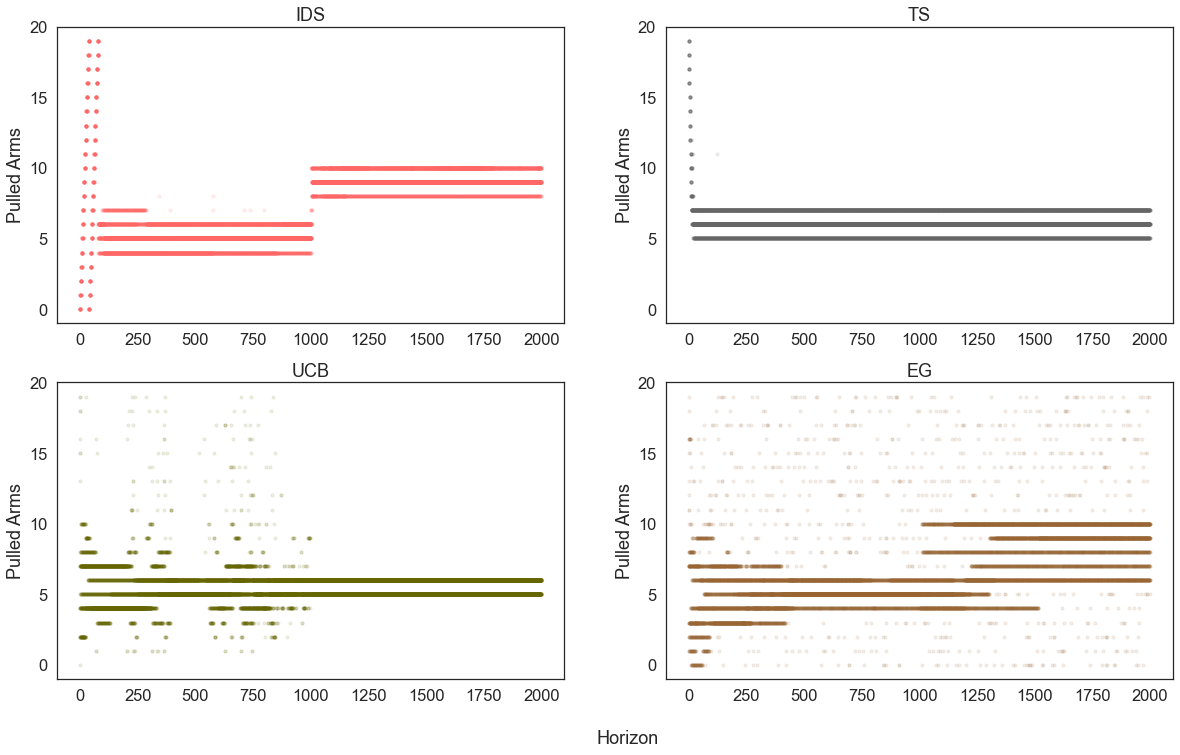

In [18]:
draw_arm(IDS_3_df_arm, TS_df_arm, UCBT_df_arm, EG_1_df_arm)

In [ ]:
# import matplotlib.patches as mpatches
# def draw_exp_graph(IDS_1,IDST_1,UCB,UCBPI,TS, EG,sd=2):
#     IDS_1_mean = IDS_1.mean()
#     IDST_1_mean = IDST_1.mean()
#     UCB_mean = UCB.mean()
#     UCBPI_mean = UCBPI.mean()
#     TS_mean = TS.mean()
#     EG_mean = EG.mean()
    
#     T = np.arange(IDS_1.shape[1])
    
#     plt.figure(figsize=(30,20))
#     sns.set(font_scale=2)
    
#     for i in range(EG.shape[0]):
#         plt.plot(EG.iloc[i],alpha=0.2,color='pink')
#     plt.plot(EG_mean,alpha=1,color='pink')
#     plt.fill_between(T, EG.min(), EG.max(), color='pink', alpha=0.2)
    
#     for i in range(TS.shape[0]):
#         plt.plot(TS.iloc[i],alpha=0.2,color='purple')
#     plt.plot(TS_mean,alpha=1,color='purple')
#     plt.fill_between(T, TS.min(), TS.max(), color='purple', alpha=0.2)
    
#     for i in range(UCB.shape[0]):
#         plt.plot(UCB.iloc[i],alpha=0.2,color='gray')
#     plt.plot(UCB_mean,alpha=1,color='gray')
#     plt.fill_between(T, UCB.min(), UCB.max(), color='gray', alpha=0.2)
    
#     for i in range(UCBPI.shape[0]):
#         plt.plot(UCBPI.iloc[i],alpha=0.2,color='black')
#     plt.plot(UCBPI_mean,alpha=1,color='black')
#     plt.fill_between(T, UCBPI.min(), UCBPI.max(), color='black', alpha=0.2)

#     for i in range(IDS_1.shape[0]):
#         plt.plot(IDS_1.iloc[i],alpha=0.2,color='red')
#     plt.plot(IDS_1_mean,alpha=1,color='red')
#     plt.fill_between(T, IDS_1.min(), IDS_1.max(), color='red', alpha=0.2)
    
#     for i in range(IDST_1.shape[0]):
#         plt.plot(IDST_1.iloc[i],alpha=0.2,color='blue')
#     plt.plot(IDST_1_mean,alpha=1,color='blue')
#     plt.fill_between(T, IDST_1.min(), IDST_1.max(), color='blue', alpha=0.2)
    
#     leg_UCB = mpatches.Patch(color='gray', label='UCB')
#     leg_UCBPI = mpatches.Patch(color='black', label='UCBPI')
#     leg_IDS_1 = mpatches.Patch(color='red', label='IDS_1')
#     leg_IDST_1 = mpatches.Patch(color='blue', label='IDST_1')
#     leg_TS = mpatches.Patch(color='purple', label='TS')
#     leg_EG = mpatches.Patch(color='pink', label='EG')
    
#     plt.legend(handles=[leg_UCB, leg_UCBPI, leg_IDS_1, leg_IDST_1, leg_TS, leg_EG], loc= 'lower right')
#     plt.show()

    
# draw_exp_graph(IDS_1_df,IDST_1_df,UCB_df,UCBPI_df,TS_df,EG_df,sd=1)

In [ ]:
# sns.set(font_scale=1)
# print('IDS_1')
# plt.plot(IDS_1_arm)
# plt.show()
# print(IDS_1_re[-300:].mean())
# print('collection rounds:', IDS_1.collection_rounds)

# print('IDS_2')
# plt.plot(IDS_2_arm)
# plt.show()
# print(IDS_2_re[-300:].mean())
# print('collection rounds:', IDS_2.collection_rounds)

# print('IDS_3')
# plt.plot(IDS_3_arm)
# plt.show()
# print(IDS_3_re[-300:].mean())
# print('collection rounds:', IDS_3.collection_rounds)

# print('IDST_1')
# plt.plot(IDST_1_arm)
# plt.show()
# print(IDST_1_re[-300:].mean())
# print('collection rounds:', IDST_1.collection_rounds)

# print('UCB1')
# plt.plot(UCB1_arm)
# plt.show()
# print(UCB1_re[-300:].mean())

# print('UCBPI')
# plt.plot(UCBPI_arm)
# plt.show()
# print(UCBPI_re[-300:].mean())

# print('TS')
# plt.plot(TS_arm)
# plt.show()
# print(TS_re[-300:].mean())

# print('EG')
# plt.plot(EG_arm)
# plt.show()
# print(EG_re[-300:].mean())